<style>
body {
    font-size: 1.7em;
} 

.rendered_html h1 {
  font-size: 3.8em;
}

.rendered_html h2 {
  font-size: 2.2em;
}

.rendered_html h3 {
  font-size: 1.8em;
}

.rendered_html h4 {
  font-size: 1.4em;
}

div.slides {
width: 1920px;
height: 1080px;
}

.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}

</style>

# <font color="#BD1550">Analytics</font>
## Jupyter Notebook, pandas


-------
### Prof. Dr. Helena Mihaljević
#### WS 2019/20


# Jupyter Notebook

- ursprünglich für Julia, python und R entwickelt (deshalb **Ju**-**py**-te**R**); mittlerweile >40 Sprachen  unterstützt 
- läuft im Browser
- open-source 
- **literate programming**: Software development Stil, bei welchem verständlicher Text und Code-Blöcke sich abwechseln
- Code, Text, Formeln und inline-Visualisierungen in Einem
- mittlerweile gibt es JupyterHub als multi-user Version für kollaboratives Arbeiten
- Extrem beliebt, in Wissenschaft und Unternehmen
- Artikel zu Jupyter Notebooks in *Nature*: https://www.nature.com/news/interactive-notebooks-sharing-the-code-1.16261

## Ein paar Tipps

* Nicht den gesamten Code in eine Zelle schreiben
* Markdown-Zellen nutzen um Ideen zu dokumentieren oder Fragen/Hypothesen festzuhalten
* Shortcuts benutzen: z.B. Shift+Enter um Code auszuführen
* Zugriff auf **Dokumentation** mit Hilfe von `?`, z.B.
```python
import pandas as pd
pd.Series?
```
* **Auto-Completion** von Code über Tab-Taste, z.B. tippe `pd.Series.` + Tab, um alle verfügbaren Methoden und Attribute für diese Klasse zu sehen
* Advanced stuff: Cell Magics, Interactive Dashboards, uvm. Es gibt viele Blogs zu Jupyter Notebooks, siehe z.B. hier: https://www.analyticsvidhya.com/blog/2018/05/starters-guide-jupyter-notebook/

## Übung

1. aktivieren Sie in einem Terminal Ihre virtuelle Umgebung
2. Installieren Sie das python Paket `jupyter`
3. Starten Sie danach das jupyter Notebook, indem Sie `jupyter notebook` direkt ins Terminal eingeben
4. Probieren Sie, dort Code auszuführen, Text in Markdown-Syntax zu schreiben etc. Sie können auch versuchen, eine ältere Hausaufgabe dort nochmal zu schreiben

## Pros und Cons

### Pros 

- viele nützliche Features (siehe z.B. Cell Magics)
- inline plotting
- interactive plots
- remote execution

 
### Cons

 - hidden state
 - version control ist schwierig
 - testen ist schwierig

## Empfehlung

**(Daten-)Explorationen** in Jupyter Notebook starten, danach Code wie bisher modularisieren und nach gelerneten (und weiteren) Engineering Best Practices strukturieren.

# Pandas

- **pan**el **da**ta
- DataFrames für Python
- Read/Write für viele Formate
- Viele Operationen deutlich effizienter als in plain python
- Database-like API
- Sehr beliebt in Data Science

## Pandas - Why Python is booming

<img src="figures/pandas_popularity.png" width=500px/>

[Stackoverflow Blog: Why is Python Growing So Quickly?](https://stackoverflow.blog/2017/09/14/python-growing-quickly/)

# Pandas Data Structures

- ``DataFrame``: 
    Tabelle  (denk an Abbildung von relationalen Tabellen)
- ``Series``: 
    1-dimensionale Daten-Struktur mit Index (denk an Abbildung von einer Tabellenspalte)

# `pandas Series` 

one-dimensional array of indexed data


In [1]:
import pandas as pd

# create a pandas Series
series_a = pd.Series([0.25, 0.5, 0.75, 1.0])
series_a

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [2]:
series_a.index

RangeIndex(start=0, stop=4, step=1)

In [3]:
series_a.values

array([0.25, 0.5 , 0.75, 1.  ])

## Generating a `pandas Series`

Ein `Series` Objekt kann aus den meisten python *collections* generiert werden,
und unterstützt somit alle üblichen Typen in den Daten.


In [4]:
# a list
list_a = ['one','two','three']

series_b = pd.Series(list_a)
series_b

0      one
1      two
2    three
dtype: object

In [5]:
# a list with indices
list_a = ['one','two','three']
list_b = ['index_one','index_two','index_three']

series_c = pd.Series(data=list_a, index=list_b)
series_c

index_one        one
index_two        two
index_three    three
dtype: object

In [6]:
# creating a Series with same value 
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

## Warum ist das nützlich? 

* viele Gründe, warum solche Datenstruktures sinnvoll
* viele haben mit Geschwindigkeit zu tun
* Oder mit "Bedienungskomfort":

In [7]:
fruits = pd.Series([1,0,2,2], index=['apples','oranges','bananas','lemons'])
more_fruits = pd.Series([1,0,1,5], index=['lemons','oranges','apples','bananas'])

In [8]:
fruits

apples     1
oranges    0
bananas    2
lemons     2
dtype: int64

In [9]:
more_fruits

lemons     1
oranges    0
apples     1
bananas    5
dtype: int64

In [10]:
fruits + more_fruits

apples     2
bananas    7
lemons     3
oranges    0
dtype: int64

## Mehr Beispiele


In [11]:
berlin_year_to_population = {
 '1917': 1681916,
 '1919': 1902509,
 '1925': 4024286,
 '1933': 4242501,
 '1939': 4338756,
 '1945': 2807405,
 '1946': 3170832,
 '1950': 3336026,
 '1960': 3274016,
 '1970': 3208719,
 '1980': 3048759,
 '1990': 3433695,
 '2000': 3382169,
 '2005': 3394000,
 '2010': 3460725,
 '2015': 3520031}

population = pd.Series(berlin_year_to_population)

In [12]:
# show me first 5 rows 
# can also call head() with a parameter specifying the number of rows
population.head()

1917    1681916
1919    1902509
1925    4024286
1933    4242501
1939    4338756
dtype: int64

Text(0.5, 0, 'Year')

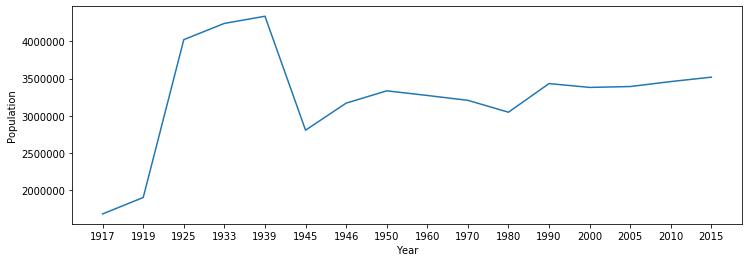

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=[12,4])
plt.plot(population)
plt.ylabel("Population")
plt.xlabel("Year")

## Indexing a `pandas Series`


In [14]:
population.name = 'Population'
population.index.name = 'Year'
# note that the indices are strings
population

Year
1917    1681916
1919    1902509
1925    4024286
1933    4242501
1939    4338756
1945    2807405
1946    3170832
1950    3336026
1960    3274016
1970    3208719
1980    3048759
1990    3433695
2000    3382169
2005    3394000
2010    3460725
2015    3520031
Name: Population, dtype: int64

In [15]:
population['1917']

1681916

In [16]:
population[['1917','1925','1945','2010']]

Year
1917    1681916
1925    4024286
1945    2807405
2010    3460725
Name: Population, dtype: int64

In [17]:
population['1925':'1950']

Year
1925    4024286
1933    4242501
1939    4338756
1945    2807405
1946    3170832
1950    3336026
Name: Population, dtype: int64

In [18]:
population > 4e6

Year
1917    False
1919    False
1925     True
1933     True
1939     True
1945    False
1946    False
1950    False
1960    False
1970    False
1980    False
1990    False
2000    False
2005    False
2010    False
2015    False
Name: Population, dtype: bool

In [19]:
# filter Series by condition
population[population > 4e6]

Year
1925    4024286
1933    4242501
1939    4338756
Name: Population, dtype: int64

In [83]:
population_ = population.copy() # Series mutable; ohne copy verändern Sie das ursprüngliche Objekt 
population_[population_ > 4e6] = "more than four million"
population_

Year
1917                   1681916
1919                   1902509
1925    more than four million
1933    more than four million
1939    more than four million
1945                   2807405
1946                   3170832
1950                   3336026
1960                   3274016
1970                   3208719
1980                   3048759
1990                   3433695
2000                   3382169
2005                   3394000
2010                   3460725
2015                   3520031
Name: Population, dtype: object

In [21]:
population[population==1681916]

Year
1917    1681916
Name: Population, dtype: int64

In [22]:
# komplexere Bedingungen
population[(population==1681916) | (population==3460725)]

Year
1917    1681916
2010    3460725
Name: Population, dtype: int64

## Dictionary-like Zugriff

In [23]:
data = pd.Series([0.5, 1, 1.5, 2], index=['a', 'b', 'c', 'd'])
data

a    0.5
b    1.0
c    1.5
d    2.0
dtype: float64

In [24]:
data['b']

1.0

In [25]:
'a' in data

True

In [26]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [27]:
list(data.items())

[('a', 0.5), ('b', 1.0), ('c', 1.5), ('d', 2.0)]

In [28]:
data['e'] = 1.25
data

a    0.50
b    1.00
c    1.50
d    2.00
e    1.25
dtype: float64

## Array-like Zugriff

In [29]:
# slicing by explicit index
data['a':'c']

a    0.5
b    1.0
c    1.5
dtype: float64

In [30]:
# slicing by implicit integer index
data[0:2]

a    0.5
b    1.0
dtype: float64

In [31]:
# fancy indexing
data[['a', 'e']]

a    0.50
e    1.25
dtype: float64

## Explicit and Positional Indexing

- Pandas Objekte können auf unterschiedliche Art indexiert werden: 
 - explicit indices: was man selbst als Index definiert
 - positional index: die row number
- Auf einzelne Zeilen (und in DataFrames später auch auf Spalten) kann man wieder mit dem [] Operator zugreifen
- Allerdings nicht immer klar, welche Art von Indexing wann benutzt wird
- Empfehlung: explizit die Art des Zugriffs spezifizieren: ``loc`` (explicit indexing) or ``iloc`` (positional indexing)

In [32]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [33]:
data[1]

'a'

In [34]:
# explicit index for more rows
data[[1,3]]

1    a
3    b
dtype: object

In [35]:
# positional index for slicing
data[1:3]

3    b
5    c
dtype: object

In [36]:
# positional index when actual index is not integer valued
data[1]

'a'

### Explicit Indexing with ``loc``

In [37]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data.loc[1]

'a'

In [38]:
#  loc for explicit indexing
data.loc[1:3]

1    a
3    b
dtype: object

### Positional Indexing with ``iloc``

In [39]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data.iloc[1]

'b'

In [40]:
data.iloc[1:3]

3    b
5    c
dtype: object

## Methoden auf `pandas Series`

- Effiziente arithmetische Operationen und Aggregationen
- Geben in der Regel das neue Objekt zurück und verändern nicht (dafür Parameter `inplace=True`)

In [41]:
population_in_millions = population / 1e6
population_in_millions

Year
1917    1.681916
1919    1.902509
1925    4.024286
1933    4.242501
1939    4.338756
1945    2.807405
1946    3.170832
1950    3.336026
1960    3.274016
1970    3.208719
1980    3.048759
1990    3.433695
2000    3.382169
2005    3.394000
2010    3.460725
2015    3.520031
Name: Population, dtype: float64

In [42]:
# histograms: welcher Wert kommt wie häufig vor
population_in_millions.value_counts()

4.338756    1
3.433695    1
3.170832    1
3.520031    1
3.208719    1
4.242501    1
3.048759    1
3.274016    1
1.681916    1
3.382169    1
2.807405    1
3.460725    1
4.024286    1
3.394000    1
1.902509    1
3.336026    1
Name: Population, dtype: int64

In [43]:
# sorting 
population.sort_values()

Year
1917    1681916
1919    1902509
1945    2807405
1980    3048759
1946    3170832
1970    3208719
1960    3274016
1950    3336026
2000    3382169
2005    3394000
1990    3433695
2010    3460725
2015    3520031
1925    4024286
1933    4242501
1939    4338756
Name: Population, dtype: int64

In [44]:
# for sorting inplace do below
# population.sort_values(inplace_True)

In [45]:
# the good old len still available
len(population)

16

In [46]:
# basic stats
population.describe()

count    1.600000e+01
mean     3.264147e+06
std      7.063045e+05
min      1.681916e+06
25%      3.140314e+06
50%      3.359098e+06
75%      3.475552e+06
max      4.338756e+06
Name: Population, dtype: float64

## Applying arbitrary functions

In [47]:
def int_divide_by_million(v):
    """Divides number by a million and returns its integer representation"""
    return int(v / 1e6)

int_divide_by_million(35 * 1e6)

35

In [48]:
population.map(int_divide_by_million)

Year
1917    1
1919    1
1925    4
1933    4
1939    4
1945    2
1946    3
1950    3
1960    3
1970    3
1980    3
1990    3
2000    3
2005    3
2010    3
2015    3
Name: Population, dtype: int64

### Vorteile von `map` (oder `apply`)

* Geschwindigkeit
* Lässt sich parallelisieren
* Code klarer und modularer

# `pandas DataFrame`

Denk an relationale Tabelle

## Generating `pandas DataFrame`

In [50]:
import numpy as np

In [51]:
some_numpy_array = np.arange(9).reshape((3, 3))
some_numpy_array

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [52]:
df = pd.DataFrame(some_numpy_array,
                  index=['a', 'c', 'd'],
                  columns=['Ohio', 'Texas', 'California'])
df

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


### Constructors

|Type | Notes|
|-----|------|
|2D ndarray|A matrix of data, passing optional row and column labels|
|dict of arrays, lists, or tuples|Each sequence becomes a column in the DataFrame; all sequences must be the same length|
|NumPy structured/record array|Treated as the “dict of arrays” case
|dict of Series|Each value becomes a column|
|dict of dicts|Each inner dict becomes a column|
|List of dicts or Series|Each item becomes a row in the DataFrame|
|List of lists or tuples|Treated as the “2D ndarray” case|
|Another DataFrame|The DataFrame’s indexes are used unless different ones are passed|
|NumPy MaskedArray|Like the “2D ndarray” case except masked values become NA/missing in the DataFrame result|



### `DataFrame` from a csv file

kommt sehr oft vor

In [53]:
import os
file_path = os.path.join("data","berlin_population.csv")

In [54]:
berlin_population = pd.read_csv(file_path)

In [55]:
berlin_population.head()

,Borough,Population 30 September 2010,Area in km²,Largest Non-German ethnic groups
0,Mitte,332100,39.47,"Turks, Arabs, Kurds, many Asians, Africans and..."
1,Friedrichshain-Kreuzberg,268831,20.16,"Turks, Arabs, African, Kurds, Chinese"
2,Pankow,368956,103.01,"Poles, Italians, French, Americans, Vietnamese..."
3,Charlottenburg-Wilmersdorf,320014,64.72,"Turks, Africans, Russians, Arabs, others."
4,Spandau,225420,91.91,"Turks, Africans, Russians, Arabs, others."


### `pandas DataFrame` IO 

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th>Format Type</th>      <th>Data Description</th>      <th>Reader</th>      <th>Writer</th>    </tr>  </thead>  <tbody>    <tr>      <td>text</td>      <td>CSV</td>      <td>read_csv</td>      <td>to_csv</td>    </tr>    <tr>      <td>text</td>      <td>JSON</td>      <td>read_json</td>      <td>to_json</td>    </tr>    <tr>      <td>text</td>      <td>HTML</td>      <td>read_html</td>      <td>to_html</td>    </tr>    <tr>      <td>text</td>      <td>Local clipboard</td>      <td>read_clipboard</td>      <td>to_clipboard</td>    </tr>    <tr>      <td>binary</td>      <td>MS Excel</td>      <td>read_excel</td>      <td>to_excel</td>    </tr>    <tr>      <td>binary</td>      <td>HDF5 Format</td>      <td>read_hdf</td>      <td>to_hdf</td>    </tr>    <tr>      <td>binary</td>      <td>Feather Format</td>      <td>read_feather</td>      <td>to_feather</td>    </tr>    <tr>      <td>binary</td>      <td>Parquet Format</td>      <td>read_parquet</td>      <td>to_parquet</td>    </tr>    <tr>      <td>binary</td>      <td>Msgpack</td>      <td>read_msgpack</td>      <td>to_msgpack</td>    </tr>    <tr>      <td>binary</td>      <td>Stata</td>      <td>read_stata</td>      <td>to_stata</td>    </tr>    <tr>      <td>binary</td>      <td>SAS</td>      <td>read_sas</td>      <td></td>    </tr>    <tr>      <td>binary</td>      <td>Python Pickle Format</td>      <td>read_pickle</td>      <td>to_pickle</td>    </tr>    <tr>      <td>SQL</td>      <td>SQL</td>      <td>read_sql</td>      <td>to_sql</td>    </tr>    <tr>      <td>SQL</td>      <td>Google Big Query</td>      <td>read_gbq</td>      <td>to_gbq</td>    </tr>  </tbody></table>'

## Accessing values in `pandas DataFrame`


In [56]:
# some data
berlin_population_by_borough = {
  'Area in km²': {
    'Charlottenburg-Wilmersdorf': 64.72,
    'Friedrichshain-Kreuzberg': 20.16,
    'Lichtenberg': 52.29,
    'Marzahn-Hellersdorf': 61.74,
    'Mitte': 39.47,
    'Neukölln': 44.93,
    'Pankow': 103.01,
    'Spandau': 91.91,
    'Steglitz-Zehlendorf': 102.5,
    'Tempelhof-Schöneberg': 53.09,
    'Treptow-Köpenick': 168.42},
 'Population 30 September 2010': {
    'Charlottenburg-Wilmersdorf': 320014,
    'Friedrichshain-Kreuzberg': 268831,
    'Lichtenberg': 259881,
    'Marzahn-Hellersdorf': 248264,
    'Mitte': 332100,
    'Neukölln': 310283,
    'Pankow': 368956,
    'Spandau': 225420,
    'Steglitz-Zehlendorf': 293989,
    'Tempelhof-Schöneberg': 335060,
    'Treptow-Köpenick': 241335}}


In [57]:
# a DataFrame from a dictionary of dictionaries
df = pd.DataFrame(berlin_population_by_borough)
df

,Area in km²,Population 30 September 2010
Charlottenburg-Wilmersdorf,64.72,320014
Friedrichshain-Kreuzberg,20.16,268831
Lichtenberg,52.29,259881
Marzahn-Hellersdorf,61.74,248264
Mitte,39.47,332100
Neukölln,44.93,310283
Pankow,103.01,368956
Spandau,91.91,225420
Steglitz-Zehlendorf,102.50,293989
Tempelhof-Schöneberg,53.09,335060


In [58]:
# like Series (and tables in DBs) DataFrames have indices
df.index

Index(['Charlottenburg-Wilmersdorf', 'Friedrichshain-Kreuzberg', 'Lichtenberg',
       'Marzahn-Hellersdorf', 'Mitte', 'Neukölln', 'Pankow', 'Spandau',
       'Steglitz-Zehlendorf', 'Tempelhof-Schöneberg', 'Treptow-Köpenick'],
      dtype='object')

In [59]:
# Accessing by row and column index
df.loc['Friedrichshain-Kreuzberg','Area in km²']

20.16

In [60]:
# Accessing an entire column
df.loc[:,'Area in km²']

Charlottenburg-Wilmersdorf     64.72
Friedrichshain-Kreuzberg       20.16
Lichtenberg                    52.29
Marzahn-Hellersdorf            61.74
Mitte                          39.47
Neukölln                       44.93
Pankow                        103.01
Spandau                        91.91
Steglitz-Zehlendorf           102.50
Tempelhof-Schöneberg           53.09
Treptow-Köpenick              168.42
Name: Area in km², dtype: float64

In [61]:
# Accessing an entire column
df['Area in km²']

Charlottenburg-Wilmersdorf     64.72
Friedrichshain-Kreuzberg       20.16
Lichtenberg                    52.29
Marzahn-Hellersdorf            61.74
Mitte                          39.47
Neukölln                       44.93
Pankow                        103.01
Spandau                        91.91
Steglitz-Zehlendorf           102.50
Tempelhof-Schöneberg           53.09
Treptow-Köpenick              168.42
Name: Area in km², dtype: float64

In [62]:
[b for b in df.index if 'berg' in b.lower()]

['Friedrichshain-Kreuzberg', 'Lichtenberg', 'Tempelhof-Schöneberg']

In [63]:
df.loc[['Friedrichshain-Kreuzberg', 'Lichtenberg', 'Tempelhof-Schöneberg'],:]

,Area in km²,Population 30 September 2010
Friedrichshain-Kreuzberg,20.16,268831
Lichtenberg,52.29,259881
Tempelhof-Schöneberg,53.09,335060


In [64]:
# a single column of a DataFrame is a Series
df['Population 30 September 2010']

Charlottenburg-Wilmersdorf    320014
Friedrichshain-Kreuzberg      268831
Lichtenberg                   259881
Marzahn-Hellersdorf           248264
Mitte                         332100
Neukölln                      310283
Pankow                        368956
Spandau                       225420
Steglitz-Zehlendorf           293989
Tempelhof-Schöneberg          335060
Treptow-Köpenick              241335
Name: Population 30 September 2010, dtype: int64

In [65]:
# boolean indexing
df['Population 30 September 2010'] > 3e5

Charlottenburg-Wilmersdorf     True
Friedrichshain-Kreuzberg      False
Lichtenberg                   False
Marzahn-Hellersdorf           False
Mitte                          True
Neukölln                       True
Pankow                         True
Spandau                       False
Steglitz-Zehlendorf           False
Tempelhof-Schöneberg           True
Treptow-Köpenick              False
Name: Population 30 September 2010, dtype: bool

In [66]:
# boolean indexing
df[df['Population 30 September 2010'] > 3e5]

,Area in km²,Population 30 September 2010
Charlottenburg-Wilmersdorf,64.72,320014
Mitte,39.47,332100
Neukölln,44.93,310283
Pankow,103.01,368956
Tempelhof-Schöneberg,53.09,335060


In [67]:
# boolean row indexing with column indexing
df.loc[df['Population 30 September 2010'] > 3e5,'Population 30 September 2010']

Charlottenburg-Wilmersdorf    320014
Mitte                         332100
Neukölln                      310283
Pankow                        368956
Tempelhof-Schöneberg          335060
Name: Population 30 September 2010, dtype: int64

## Methoden auf `DataFrame`

- Alle `Series` Methoden funktionieren auf Spalten eines `DataFrame` 
- Alle standard DB Operationen und vieles mehr wird unterstützt

In [69]:
df['Density'] = df['Population 30 September 2010'] / df['Area in km²']
df = df.sort_values(by=['Density'])
df

,Area in km²,Population 30 September 2010,Density
Treptow-Köpenick,168.42,241335,1432.935518
Spandau,91.91,225420,2452.616690
Steglitz-Zehlendorf,102.50,293989,2868.185366
Pankow,103.01,368956,3581.749345
Marzahn-Hellersdorf,61.74,248264,4021.120829
Charlottenburg-Wilmersdorf,64.72,320014,4944.592089
Lichtenberg,52.29,259881,4969.994263
Tempelhof-Schöneberg,53.09,335060,6311.169712
Neukölln,44.93,310283,6905.920320
Mitte,39.47,332100,8413.985305


## Database style joins

In [70]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data1': range(7)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [71]:
df2 = pd.DataFrame({'key': ['a', 'b', 'd'], 'data2': range(3)})
df2

,key,data2
0,a,0
1,b,1
2,d,2


### Inner join

In [72]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


### Outer join

In [73]:
pd.merge(df1, df2, on='key', how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


### Concatenation

In [74]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s1

a    0
b    1
dtype: int64

In [75]:
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s2

c    2
d    3
e    4
dtype: int64

In [76]:
s3 = pd.Series([5, 6], index=['f', 'g'])
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [77]:
pd.concat([s1, s2, s3], axis=1, sort=True)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


# Exploration von Kindernamen in Berlin

Datenquelle: [data portal Berlin](https://daten.berlin.de/search/node/vornamen)


In [78]:
# check the URL syntax
df = pd.read_csv("https://www.berlin.de/daten/liste-der-vornamen-2013/charlottenburg-wilmersdorf.csv",
                 sep=';',
                 error_bad_lines=False)

In [79]:
df.head()

,vorname,anzahl,geschlecht
0,Marie,121,w
1,Sophie,96,w
2,Charlotte,77,w
3,Emilia,66,w
4,Paul,64,m


In [80]:
import urllib
import os

stadtteile = [
"charlottenburg-wilmersdorf",
"friedrichshain-kreuzberg",
"lichtenberg",
"marzahn-hellersdorf",
"mitte",
"neukoelln",
"pankow",
"reinickendorf",
"spandau",
"steglitz-zehlendorf",
"tempelhof-schoeneberg",
"treptow-koepenick"
]

jahre = range(2013,2018)

In [81]:
# download all name files from Berlin open data portal
all_names = []

for stadtteil in stadtteile:
    for jahr in jahre:
        try:
            url = f"https://www.berlin.de/daten/liste-der-vornamen-{jahr}/{stadtteil}.csv"
            df_vornamen_stadtteil = pd.read_csv(url, sep=';', error_bad_lines=False)
            df_vornamen_stadtteil['stadtteil'] = stadtteil
            df_vornamen_stadtteil['year'] = jahr
            all_names.append(df_vornamen_stadtteil)
        except:
            print("File {} not found".format(url))

# concatenate DataFrames
all_names_df = pd.concat(all_names, sort=True)
# dump to file
all_names_df.to_csv(os.path.join("data","all_names_berlin.csv"), index=False)

In [82]:
all_names_df.sample(n=10)

,anzahl,geschlecht,position,stadtteil,vorname,year
1579,1,w,NaN,charlottenburg-wilmersdorf,Daila,2016
2323,1,w,NaN,friedrichshain-kreuzberg,Maxine,2014
441,1,w,NaN,steglitz-zehlendorf,Ecem,2016
2789,1,w,NaN,mitte,Myleen,2015
170,2,m,NaN,marzahn-hellersdorf,Alwin,2015
1071,2,m,NaN,mitte,Wolf,2016
774,2,m,NaN,friedrichshain-kreuzberg,Furkan,2015
875,2,w,NaN,friedrichshain-kreuzberg,Phuong,2015
2474,1,m,NaN,charlottenburg-wilmersdorf,Naveh,2013
756,1,m,NaN,reinickendorf,Jay,2013


## Übung

1. Filtern Sie die Tabelle auf die Namen für Jungen 
2. Filtern Sie die Tabelle auf die Namen für Mädchen in Friedrichshain-Kreuzberg
3. Was waren die drei beliebtesten Namen für Mädchen in Friedrichshain-Kreuzberg in 2016?
4. Was waren die drei beliebtesten Namen für Jungen in Lichtenberg in 2015?